In [25]:
import numpy as np
import matplotlib.pyplot as plt

Fix a population size of N=50 individuals. Choose the initial opinion of each individual uniformly at random in the interval $[−1,1]$.

#### 1a
Numerically solve the following system of ODEs:

$$\frac{dx_i}{dt} = \frac{1}{N} \sum_{j=1}^{N} \phi (\lvert x_j - x_i \rvert) (x_j - x_i)$$

using the interaction function:
$$ \phi_1 (\lvert x_j - x_i \rvert) =
\begin{cases}
  1, & \text{if } \lvert x_j - x_i \rvert \leq 0.4 \\
  0, & \text{if } \lvert x_j - x_i \rvert > 0.4
\end{cases}
$$

You should solve the system either until a set time T is reached,or implement a stopping criterion. Either way, make sure you give the system time to reach (or get quite near) a steady state.

In [251]:
def phi(pop):
    phi_matrix = np.zeros((len(pop), len(pop)))
    for i in range(0, len(pop)):
        for j in range(0, len(pop)):
            if np.abs(pop[i] - pop[j]) <= 0.4:
                phi_matrix[i][j] = 1
    return phi_matrix

def grad(pop, phi):
    difference_mat = np.zeros((len(pop), len(pop)))
    for i in range(0, len(pop)):
        for j in range(0, len(pop)):
            difference_mat[i][j] = pop[i] - pop[j] 
    return 1/len(pop)*(np.diag(phi(pop)@difference_mat))

In [252]:
def forward_euler(pop0, h, phi):
    t = [0, ]
    pop = [pop0,]
    while t[-1] < 50:
        pop.append(pop[-1] + grad(pop[-1], phi) *h)
        t.append(t[-1]+h)
        
    return t, pop
        

In [256]:
N = 50

pop_start = np.random.uniform(1, -1, N)

time, population = forward_euler(pop_start, 0.1, phi)

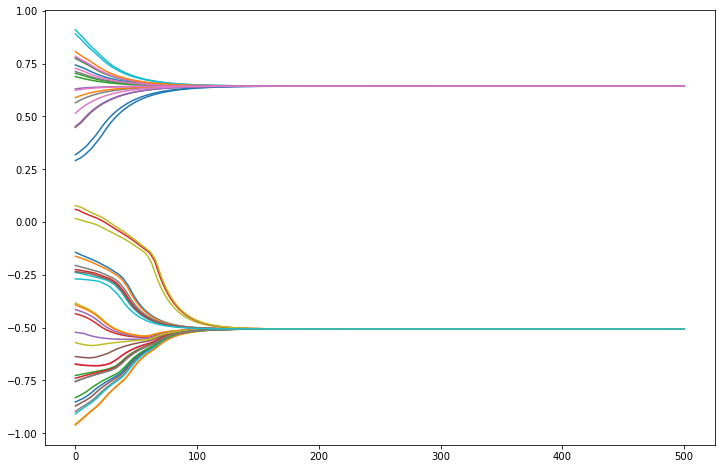

In [257]:
fig, axes = plt.subplots(1, 1, figsize = (12, 8))

axes.plot(population);

#### 1b 

Now run it with different interaction function:
$$\phi(|x_j - x_i|) = exp(-2|x_j - x_i|)$$



In [260]:
def phi_2(pop):
    phi_matrix = np.zeros((len(pop), len(pop)))
    for i in range(0, len(pop)):
        for j in range(0, len(pop)):
            phi_matrix[i][j] = np.exp(-2*np.abs(pop[i] - pop[j]))
    return phi_matrix
    

In [261]:
time1, population1 = forward_euler(pop_start, 0.1, phi)
time2, population2 = forward_euler(pop_start, 0.1, phi_2)

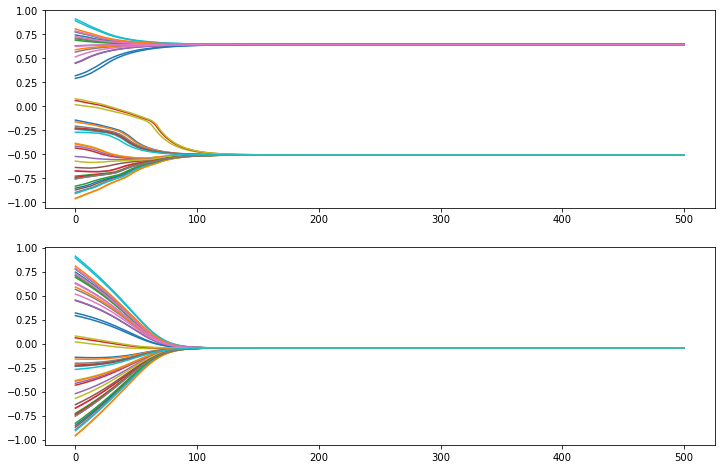

In [263]:
fig1, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 8))

ax1.plot(population);
ax2.plot(population2);

#### 2a Networks
Create a random matrix using the following method (or skip to the spoilers): 
1. Create a random N×N matrix with entries that are 1’s with probability p=0.1 and 0’s with probability 1−p.
2. Make the matrix symmetric by replacing the upper diagonal with the lower diagonal. 
3. Ensure that all entries on the diagonal of the matrix are 1’s.

Gives a random matrix representing connections in a social network.

In [269]:
p = 0.1
#creates randomly assigned matrix based on probabilities
A = np.random.choice([0,1], size=(N,N), p=[1-p,p])
#creates symmetric matrix by combining lower triangular with upper triangular of the transpose (same as lower triangular), 
#except the one means to ignore the leading diagonal so that is not repeated
A = np.tril(A) + np.triu(A.T,1)
#fill diagonal values with 1
np.fill_diagonal(A, 1)

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

#### 2b Network ODE

Adapt code from question 1 to solve following system of ODEs

$$\frac{dx_i}{dt} = \frac{1}{k_i} \sum_{j=1}^{N} A_{ij} \phi \lvert x_j - x_i \rvert (x_j - x_i) $$

where $ k_i = \sum_{j=1}^{N} A_{ij} $

In [319]:
def grad1(pop, phi, A):
    difference_mat = np.zeros((len(pop), len(pop)))
    k = np.zeros(len(pop))
    for i in range(0, len(pop)):
        k[i] = np.sum(A[i, :])
        for j in range(0, len(pop)):
            difference_mat[i][j] = pop[i] - pop[j] 
    return (1/k)*(np.diag(A*phi(pop)@difference_mat))

def forward_euler1(pop0, h, phi, A):
    t = [0, ]
    pop = [pop0,]
    while t[-1] < 50:
        pop.append(pop[-1] + grad1(pop[-1], phi, A) *h)
        t.append(t[-1]+h)
        
    return t, pop

In [324]:
pop_start = np.random.uniform(1, -1, N)

time, population3 = forward_euler1(pop_start, 0.1, phi, A)
time1, population4 = forward_euler1(pop_start, 0.1, phi_2, A)

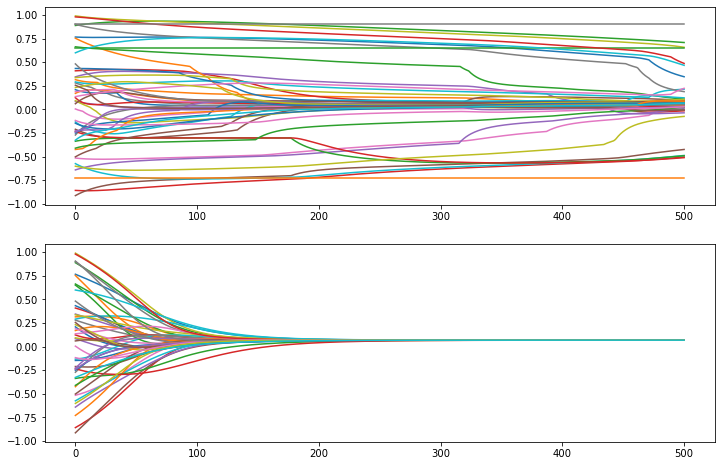

In [325]:
fig1, (ax3, ax4) = plt.subplots(2, 1, figsize = (12, 8))

ax3.plot(population3);
ax4.plot(population4);

dont know if this is right??